### About Vector Data
Vector data are composed of discrete geometric locations (x, y values) known as vertices that define the “shape” of the spatial object. The organization of the vertices determines the type of vector that you are working with. There are three types of vector data:

* Points: Each individual point is defined by a single x, y coordinate. There can be many points in a vector point file. Examples of point data include: sampling locations, the location of individual trees or the location of plots.

* Lines: Lines are composed of many (at least 2) vertices, or points, that are connected. For instance, a road or a stream may be represented by a line. This line is composed of a series of segments, each “bend” in the road or stream represents a vertex that has defined x, y location.

* Polygons: A polygon consists of 3 or more vertices that are connected and “closed”. Thus the outlines of plot boundaries, lakes, oceans, and states or countries are often represented by polygons. Occasionally, a polygon can have a hole in the middle of it (like a doughnut), this is something to be aware of but not an issue you will deal with in this tutorial.

<img src="images/points-lines-polygons-vector-data-types.png" alt="drawing" width="600"/>

In [1]:
import geopandas as gpd
from geopandas.tools import sjoin
import matplotlib.pyplot as plt
import contextily as cx

In [48]:
GEDI_df = gpd.read_file("data/GEDI_Shots/GEDI.shp")

In [9]:
GEDI_df

,rh100,geometry
0,2745.0,MULTIPOINT (152.94018 -27.46783)
1,2565.0,MULTIPOINT (152.94056 -27.46821)
2,3097.0,MULTIPOINT (152.94093 -27.46859)
3,2402.0,MULTIPOINT (152.94131 -27.46897)
4,2407.0,MULTIPOINT (152.83564 -27.48677)
...,...,...
9436,2179.0,MULTIPOINT (152.60940 -27.37744)
9437,2321.0,MULTIPOINT (152.60944 -27.37932)
9438,1298.0,MULTIPOINT (152.60983 -27.37893)
9439,1018.0,MULTIPOINT (152.61021 -27.37855)


In [3]:
RE_df = gpd.read_file("data/RE_Polygons/RE_Polygons.shp")

In [10]:
RE_df

,RE,geometry
0,12.12.3,"POLYGON ((152.95685 -27.46327, 152.95688 -27.4..."
1,12.12.3,"POLYGON ((152.84105 -27.48002, 152.84091 -27.4..."
2,12.12.2,"POLYGON ((152.64563 -26.88608, 152.64589 -26.8..."
3,12.12.7,"POLYGON ((152.56762 -27.11359, 152.56725 -27.1..."
4,12.12.9,"POLYGON ((152.43585 -27.23161, 152.43585 -27.2..."
...,...,...
75,12.11.3a,"POLYGON ((152.68184 -27.36103, 152.68073 -27.3..."
76,12.11.3a,"POLYGON ((152.67588 -27.31152, 152.67590 -27.3..."
77,12.8.20,"POLYGON ((152.94104 -26.94102, 152.94084 -26.9..."
78,12.9-10.7,"POLYGON ((152.55382 -27.45326, 152.55437 -27.4..."


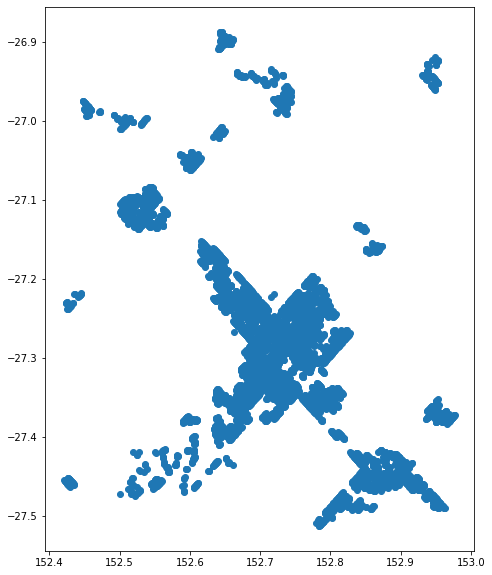

In [4]:
# plot the data using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))

GEDI_df.plot(ax=ax)
plt.show()

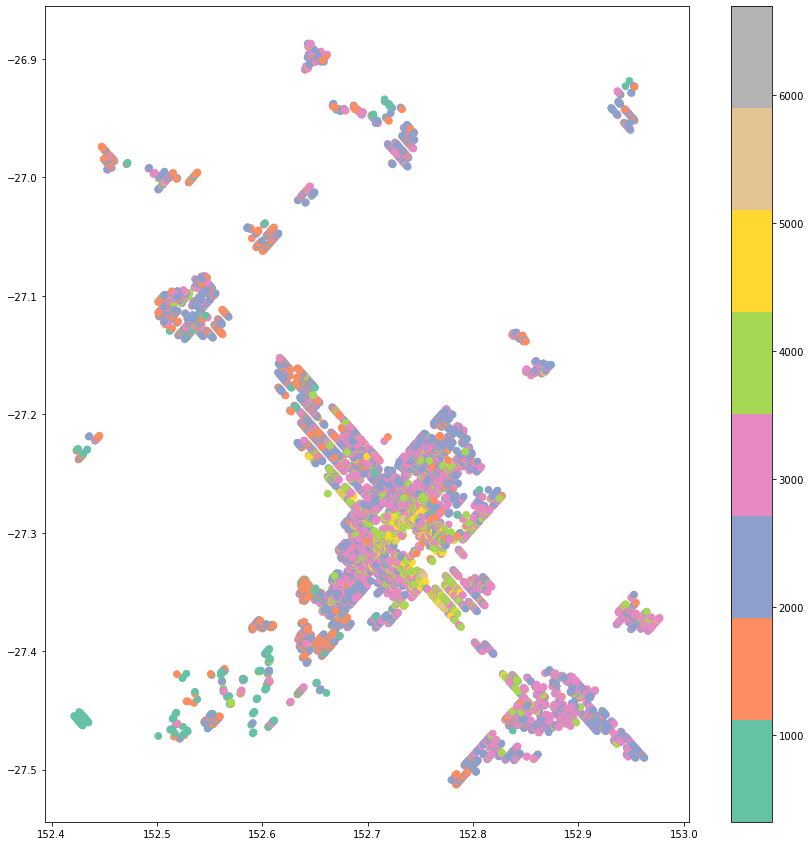

In [6]:
fig, ax = plt.subplots(figsize = (15,15))

# quickly plot the data adding a legend
GEDI_df.plot(column='rh100', 
                         legend=True, 
                         figsize=(10,6),
                         markersize=45, 
                         cmap="Set2", ax=ax);

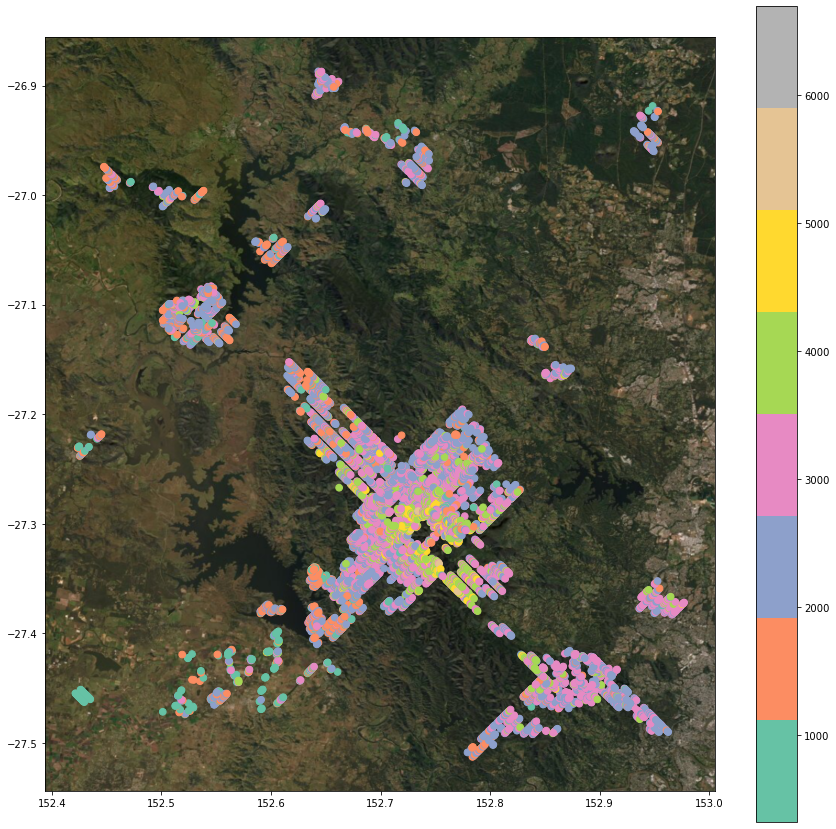

In [7]:
fig, ax = plt.subplots(figsize = (15,15))

GEDI_df.plot(column='rh100', 
                         legend=True, 
                         figsize=(10,6),
                         markersize=45, 
                         cmap="Set2", ax=ax);

cx.add_basemap(ax, crs=GEDI_df.crs, source = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}')

### Now we can apply similar code to plot our regional ecosystem polygons. 

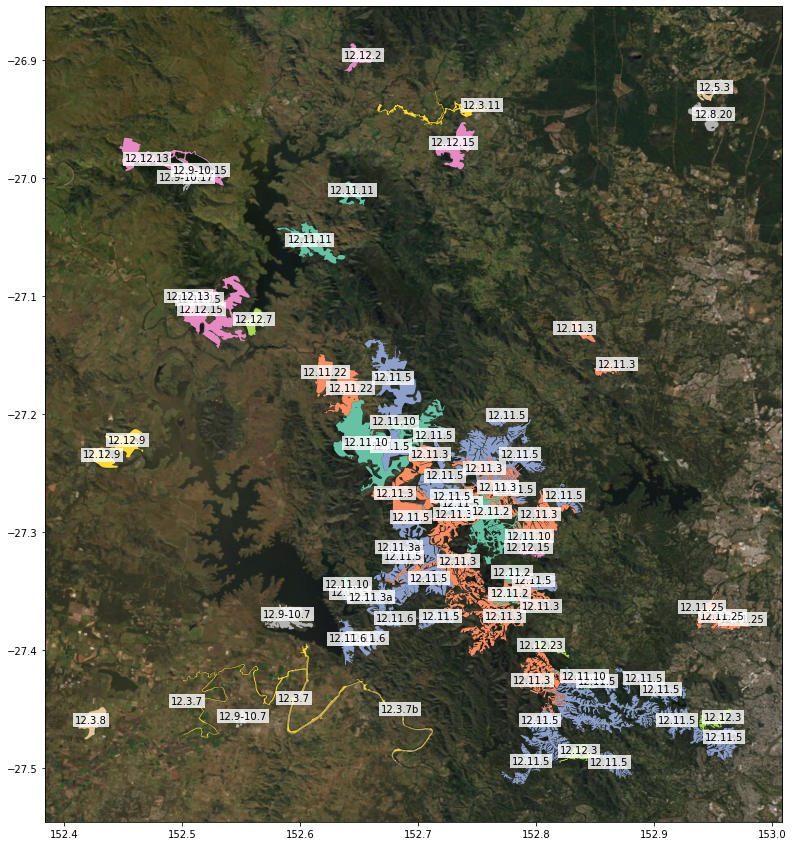

In [44]:
# Initialise fig and ax, setting the figure size. 
fig, ax = plt.subplots(figsize = (15,15))

# Plot the data
RE_df.plot(column='RE',  
                     figsize=(10,6),
                     markersize=45, 
                     cmap="Set2", ax=ax);

# Here we obtain the coordintes required to add labels to each polygon and add them to the dataframe. 
RE_df['coords'] = RE_df['geometry'].apply(lambda x: x.representative_point().coords[:])
RE_df['coords'] = [coords[0] for coords in RE_df['coords']]

# Loop through each polygon adding a label to the plot. 
for idx, row in RE_df.iterrows():
    ax.text(row.coords[0], 
            row.coords[1],
            s=row["RE"], 
            horizontalalignment='center', 
            bbox={'facecolor': 'white',
                  'alpha':0.8, 'pad': 2, 
                  'edgecolor':'none'})

# Add base map
cx.add_basemap(ax, crs=RE_df.crs, source = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}')

In [12]:
points_polys = gpd.sjoin(GEDI_df, RE_df, how="left")

points_polys

,rh100,geometry,index_right,RE
0,2745.0,MULTIPOINT (152.94018 -27.46783),0,12.12.3
1,2565.0,MULTIPOINT (152.94056 -27.46821),22,12.11.5
2,3097.0,MULTIPOINT (152.94093 -27.46859),22,12.11.5
3,2402.0,MULTIPOINT (152.94131 -27.46897),22,12.11.5
4,2407.0,MULTIPOINT (152.83564 -27.48677),1,12.12.3
...,...,...,...,...
9436,2179.0,MULTIPOINT (152.60940 -27.37744),79,12.9-10.7
9437,2321.0,MULTIPOINT (152.60944 -27.37932),79,12.9-10.7
9438,1298.0,MULTIPOINT (152.60983 -27.37893),79,12.9-10.7
9439,1018.0,MULTIPOINT (152.61021 -27.37855),79,12.9-10.7


In [24]:
stats_pt = points_polys.groupby('RE')['rh100'].agg(['mean','std','max','min'])
stats_pt

,mean,std,max,min
RE,,,,
12.11.10,2695.145688,1016.411510,6690.0,590.0
12.11.11,2074.378151,589.930662,3884.0,801.0
12.11.2,3228.650862,957.143954,5911.0,617.0
12.11.22,2248.943609,646.798339,4022.0,475.0
12.11.25,2924.743750,531.160214,4434.0,328.0
12.11.3,3293.339394,793.615873,6504.0,400.0
12.11.3a,2792.792157,625.708380,4909.0,906.0
12.11.5,2828.499863,615.182646,5606.0,550.0
12.11.6,1989.850980,577.361867,3772.0,384.0


<AxesSubplot:xlabel='RE'>

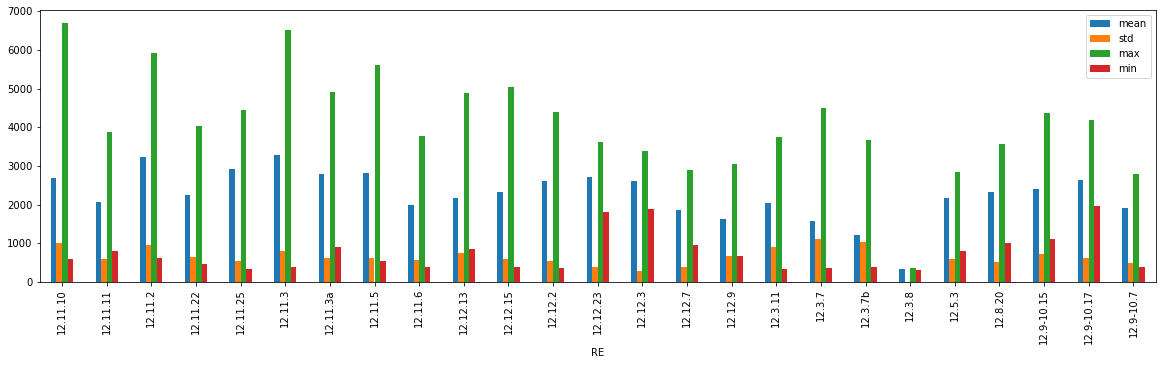

In [47]:
stats_pt.plot.bar(figsize = (20,5))